In [406]:
import random as rand
from math import sqrt
import numpy as np
import pandas as pd

In [407]:
nusers = 100
nitems = 100
k = 10

pu = np.random.rand(k,1)

Q = np.random.rand(nitems,k)
nQ = np.dot(Q,Q.T)

ru = np.dot(Q,pu)
D = (np.diag(nQ) + np.diag(nQ.T) - 2*nQ)
nitems = len(ru)
ntrans=200
state = np.ceil(np.random.rand(ntrans,2)*nitems).astype(int)
action = np.ceil(np.random.rand(ntrans,1)*nitems).astype(int)
next_state = np.ceil(np.random.rand(ntrans,2)*nitems).astype(int)
for i in range(0, len(state)):
    next_state[i][0]=state[i][1]
    next_state[i][1]=action[i][0]


In [408]:
dataset = pd.DataFrame({'state': list(state), 'action': list(action), 'next_state': list(next_state)}, columns=['state', 'action', 'next_state'])

In [409]:
dataset

,state,action,next_state
0,"[71, 11]",[64],"[11, 64]"
1,"[34, 8]",[93],"[8, 93]"
2,"[37, 65]",[56],"[65, 56]"
3,"[6, 3]",[38],"[3, 38]"
4,"[98, 5]",[84],"[5, 84]"
...,...,...,...
195,"[85, 100]",[40],"[100, 40]"
196,"[93, 60]",[19],"[60, 19]"
197,"[52, 66]",[15],"[66, 15]"
198,"[62, 63]",[40],"[63, 40]"


In [410]:
sa[89]

1.5630431521087376

In [411]:
sa=D.flatten()

In [412]:
sa

array([0.        , 1.89730526, 1.38049566, ..., 4.80634247, 6.90903468,
       0.        ])

In [413]:
sa[(state[1][1])*100+action[1][0]]

1.2471503207179264

In [414]:
p=action[0]
print(p[0])

64


In [415]:
def getReward(ru, D, state, action):
    nitems = len(ru)
    dist = D.flatten()
    try:
        reward = ru[action][0] + dist[(state[1])*nitems + action] + dist[(state[0])*nitems + action]
    except IndexError:
        reward = 1.5
    return reward

In [416]:
reward=[]
for i in range(0,len(state)):
    reward.append(getReward(ru, D, state[i],action[i]))

#reward = ru[action[0]][0] + DD[(state[1])*nitems + action[0]]
    

In [417]:
dataset["reward"]=reward

In [418]:
dataset

,state,action,next_state,reward
0,"[71, 11]",[64],"[11, 64]",[5.516362426357992]
1,"[34, 8]",[93],"[8, 93]",[7.241627772138214]
2,"[37, 65]",[56],"[65, 56]",[6.2796584889930065]
3,"[6, 3]",[38],"[3, 38]",[5.71895543408995]
4,"[98, 5]",[84],"[5, 84]",[3.6612020825741145]
...,...,...,...,...
195,"[85, 100]",[40],"[100, 40]",1.5
196,"[93, 60]",[19],"[60, 19]",[4.9148995734010335]
197,"[52, 66]",[15],"[66, 15]",[6.1877775522243255]
198,"[62, 63]",[40],"[63, 40]",[6.828728163602861]


In [419]:
from gym import Env
from gym.spaces import Discrete, Box
from numpy import int64

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from gym.spaces import Box, Discrete
from tqdm import tqdm

  
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [420]:
a=Box(low=0, high=99, shape=(1,2), dtype=int64)
k=a.sample()
print(k.shape)


(1, 2)


In [421]:
class CustomEnv(Env):
    def __init__(self):
        self.i=0
        self.action_space = Discrete(100)
        self.observation_space = Box(low=0, high=99, shape=(1,2), dtype=int64)
        self.state = self.observation_space.sample().ravel()
        
    def step(self,action):
        self.i+=1
        self.next_state = self.observation_space.sample().ravel()
        self.next_state[0] = self.state[1]
        self.next_state[1]= action
        print(self.next_state)
        reward= getReward(ru, D, self.state, action)
        self.state=self.next_state
        if self.i==12:
            done=True
        else:
            done=False
        info={}

        return self.state, reward, done, info
    def render(self):
        # Implement viz
        pass

    def reset(self):
        self.i=0
        self.state = self.observation_space.sample().ravel()
        return self.state

In [422]:
env = CustomEnv()

In [423]:
a=env.observation_space.sample().ravel()

print(a)
a[0]

[17 40]


17

In [424]:
episodes = 10 #20 shower episodes
for episode in tqdm(range(1, episodes+1)):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

100%|██████████| 10/10 [00:00<00:00, 424.39it/s]

[3 1]
[ 1 31]
[31 36]
[36 30]
[30 82]
[82 87]
[87 59]
[59  5]
[ 5 32]
[32  2]
[ 2 87]
[87 82]
Episode:1 Score:71.48628751956632
[ 4 32]
[32 92]
[92 21]
[21 39]
[39 45]
[45 64]
[64 67]
[67 45]
[45 25]
[25  8]
[ 8 42]
[42 44]
Episode:2 Score:72.52011958149299
[95 57]
[57 19]
[19 11]
[11 91]
[91 47]
[47 75]
[75 50]
[50 87]
[87 67]
[67 30]
[30 97]
[97 74]
Episode:3 Score:76.25857567492369
[35 96]
[96 17]
[17 44]
[44 54]
[54 72]
[72  4]
[ 4 24]
[24 13]
[13 30]
[30 65]
[65 57]
[57 86]
Episode:4 Score:90.10539623614275
[77 73]
[73 97]
[97 19]
[19 20]
[20 35]
[35 73]
[73 86]
[86 93]
[93 67]
[67 24]
[24 32]
[32 13]
Episode:5 Score:77.7516525967929
[96 97]
[97 55]
[55 66]
[66 65]
[65  7]
[ 7 33]
[33 28]
[28 46]
[46 41]
[41  9]
[ 9 70]
[70 60]
Episode:6 Score:78.1133241899597
[50 80]
[80 57]
[57 20]
[20  4]
[ 4 48]
[48 70]
[70 96]
[96 87]
[87 14]
[14 57]
[57 63]
[63 64]
Episode:7 Score:65.15821751283882
[ 9 20]
[20 99]
[99  5]
[ 5 11]
[11 67]
[67 64]
[64 41]
[41 86]
[86 85]
[85 25]
[25 85]
[85 83

In [425]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [426]:
states = np.shape(env.observation_space)
actions = env.action_space.n

In [427]:
states

(1, 2)

In [428]:
def build_model(states, actions):
    model = Sequential()    
    model.add(Dense(24, activation='relu', input_shape=states))
    model.add(Dense(24, activation='relu'))
    model.add(Flatten())
    model.add(Dense(actions, activation='linear'))
    return model

In [429]:
model = build_model(states, actions)

In [430]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1, 24)             72        
                                                                 
 dense_29 (Dense)            (None, 1, 24)             600       
                                                                 
 flatten_9 (Flatten)         (None, 24)                0         
                                                                 
 dense_30 (Dense)            (None, 100)               2500      
                                                                 
Total params: 3,172
Trainable params: 3,172
Non-trainable params: 0
_________________________________________________________________


In [431]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2, gamma=0.1)
    return dqn

In [432]:
dqn = build_agent(model, actions)
dqn.compile(Adam(learning_rate=1e-7), metrics=['mae'])
history=dqn.fit(env, nb_steps=1000, visualize=False, verbose=1)

Training for 1000 steps ...
Interval 1 (0 steps performed)


/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  self.outputs,


[75 18]
    1/10000 [..............................] - ETA: 1:20:45 - reward: 7.1835[18 34]
[34 34]
[34 18]
[18 34]
[34 95]
[95 95]
[95 34]
[34 89]
[89 64]
[64 18]
[18 34]


/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)


   12/10000 [..............................] - ETA: 28:23 - reward: 5.1870  [22 34]
[34 95]
[95 95]
[95 34]
[34 89]
[89 95]
   18/10000 [..............................] - ETA: 18:51 - reward: 5.1906[95 18]
[18 34]
[34 95]
[95 95]
[95 95]
[95 18]
[85 34]
   25/10000 [..............................] - ETA: 13:45 - reward: 5.0507[34 89]
[89 95]
[95 95]
[95 34]
[34 29]
[29 34]
[34 95]
[95 95]
   33/10000 [..............................] - ETA: 10:36 - reward: 4.8776[95 34]
[34 89]
[89 95]
[91 95]


/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 12 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 13 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 14 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memo

[95 95]
[95 95]
[95 95]
   40/10000 [..............................] - ETA: 8:55 - reward: 4.6886 [95 95]
[95 89]
[89 34]
[34 34]
[34 34]
[34 64]
[64 95]
[95 95]
   48/10000 [..............................] - ETA: 7:35 - reward: 4.6388[73 95]
[95 64]
[64 34]
[34 89]
[89 95]
[95 95]
[95 95]
   55/10000 [..............................] - ETA: 6:46 - reward: 4.5533[95 18]
[18 90]
[90 64]
[64 18]
[18 34]
[12 94]
[94 95]
   62/10000 [..............................] - ETA: 6:08 - reward: 4.6743[95 34]
[34 89]
[89 95]
[95 95]
[95 34]
[34 89]
[89 95]
[95 95]
   70/10000 [..............................] - ETA: 5:33 - reward: 4.6902[95 95]
[95 34]
[74 18]
[18 89]
[89 95]
[95 34]
[34 89]
   77/10000 [..............................] - ETA: 5:10 - reward: 4.7380[89 95]
[95 89]
[89 89]
[89 95]
[95 89]
[89 33]
[33 89]
[52 95]
   85/10000 [..............................] - ETA: 4:47 - reward: 4.7245[95 95]
[95 34]
[34 89]
[89 95]
[95 95]
[95 18]
[18 34]
   92/10000 [..............................] - E

In [433]:
print(model.output_shape)
print(actions)
results = dqn.test(env, nb_episodes=150, visualize=False)
print(np.mean(results.history['episode_reward'])) 


(None, 100)
100
Testing for 150 episodes ...
[28 95]
[95 95]
[95 34]
[34 89]
[89 95]
[95 95]
[95 34]
[34 89]
[89 95]
[95 95]
[95 34]
[34 89]
Episode 1: reward: 62.775, steps: 12
[88 95]
[95 95]
[95 34]
[34 89]
[89 95]
[95 95]
[95 34]
[34 89]
[89 95]
[95 95]
[95 34]
[34 89]
Episode 2: reward: 61.611, steps: 12
[21 18]
[18 18]
[18 34]
[34 95]
[95 95]
[95 34]
[34 89]
[89 95]
[95 95]
[95 34]
[34 89]
[89 95]
Episode 3: reward: 56.930, steps: 12
[56 95]
[95 95]
[95 34]
[34 89]
[89 95]
[95 95]
[95 34]
[34 89]
[89 95]
[95 95]
[95 34]
[34 89]
Episode 4: reward: 59.096, steps: 12
[64 95]
[95 95]
[95 34]
[34 89]
[89 95]
[95 95]
[95 34]
[34 89]
[89 95]
[95 95]
[95 34]
[34 89]
Episode 5: reward: 59.199, steps: 12
[84 95]
[95 95]
[95 34]
[34 89]
[89 95]
[95 95]
[95 34]
[34 89]
[89 95]
[95 95]
[95 34]
[34 89]
Episode 6: reward: 63.108, steps: 12
[79 95]
[95 95]
[95 34]
[34 89]
[89 95]
[95 95]
[95 34]
[34 89]
[89 95]
[95 95]
[95 34]
[34 89]
Episode 7: reward: 62.026, steps: 12
[88 95]
[95 95]
[95 34]


Testing for 10 episodes ...
[ 9 89]
[ 9 89]
8.733965419131824
89
[89 95]
[89 95]
2.7764587386282304
95
[95 95]
[95 95]
0.998387869218033
95
[95 34]
[95 34]
7.582748207867299
34
[34 89]
[34 89]
9.385867843486299
89
[89 95]
[89 95]
2.173133110182924
95
[95 95]
[95 95]
0.998387869218033
95
[95 34]
[95 34]
7.582748207867299
34
[34 89]
[34 89]
9.385867843486299
89
[89 95]
[89 95]
2.173133110182924
95
[95 95]
[95 95]
0.998387869218033
95
[95 34]
[95 34]
7.582748207867299
34
Episode 1: reward: 60.372, steps: 12
[27 34]
[27 34]
5.556274450046075
34
[34 95]
[34 95]
2.5237803196472473
95
[95 95]
[95 95]
2.73525052088658
95
[95 34]
[95 34]
7.582748207867299
34
[34 89]
[34 89]
9.385867843486299
89
[89 95]
[89 95]
2.173133110182924
95
[95 95]
[95 95]
0.998387869218033
95
[95 34]
[95 34]
7.582748207867299
34
[34 89]
[34 89]
9.385867843486299
89
[89 95]
[89 95]
2.173133110182924
95
[95 95]
[95 95]
0.998387869218033
95
[95 34]
[95 34]
7.582748207867299
34
Episode 2: reward: 58.678, steps: 12
[63 95]
[

Text(0, 0.5, 'reward')

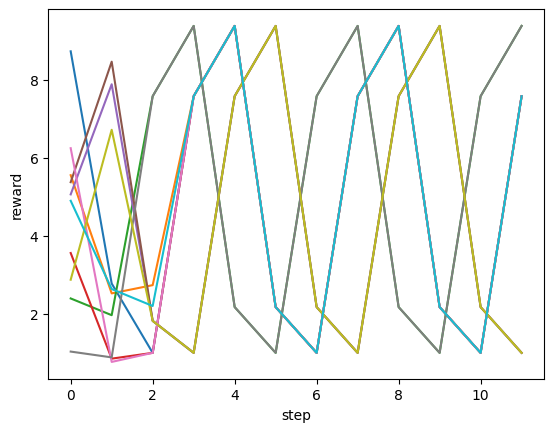

In [434]:
import rl.callbacks
class EpisodeLogger(rl.callbacks.Callback):
    def __init__(self):
        self.observations = {}
        self.rewards = {}
        self.actions = {}

    def on_episode_begin(self, episode, logs):
        self.observations[episode] = []
        self.rewards[episode] = []
        self.actions[episode] = []
        
    def on_step_end(self, step, logs):
        episode = logs['episode']
        self.observations[episode].append(logs['observation'])
        print(logs['observation'])
        print(logs['reward'])
        print(logs['action'])
        self.rewards[episode].append(logs['reward'])
        self.actions[episode].append(logs['action'])

cb_ep = EpisodeLogger()
dqn.test(env, nb_episodes=10, visualize=False, callbacks=[cb_ep])


%matplotlib inline
import matplotlib.pyplot as plt

for obs in cb_ep.rewards.values():
    plt.plot([o for o in obs])
plt.xlabel("step")
plt.ylabel("reward")